## Data Quality Assessment for Sprocket Central Pty Ltd 

This is part one of a virtual KPMG Data Analytics through the forage(https://www.theforage.com/virtual-internships/theme/m7W4GMqeT3bh9Nb2c/KPMG-Data-Analytics-Virtual-Internship?ref=NzXwZd3QGn5dP9A6e).
In this part 1 we are given the task to assess the quality of 3 datasets (transactions,customer demographic and customer address dataset), however we won't need all this data, we just need the data of the last 3 month transactions since the last transaction was made as specified in the email sent to us. From there we can assess the 3-month transaction data and combine it with the rest of the datasets (customer demographic and customer address dataset).
With this method we can save time and resources instead of assessing each dataset and combining them later.

In [177]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime, date, timedelta
import datetime

In [178]:
#importing datasets
transactions=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',header=1)
newcustomerlist=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',header=1)
customerdemographic=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',header=1)
customeraddress=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',header=1)

To insure the quality of these datasets, at least the standard data quality dimensions have to be followed which are Accuracy, Completeness, Consistency, Currency, Relevancy, Validity and Uniqueness.

###  Missing Values

#### 1. Transactions

In [179]:
# Columns with missing values
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [180]:
# Total missing values
transactions.isna().sum().sum()

1542

In the transactions dataset we have 7 columns with empth values, however we see that most of these columns have almost the same number of empty values which is 197. Let's find out why?

From the *brand* column we can see horizontal lines (which indicates null values), shows that the 197 missing rows are actually the same rows on each column that has missing values except *online_order*  which has 360 missing values

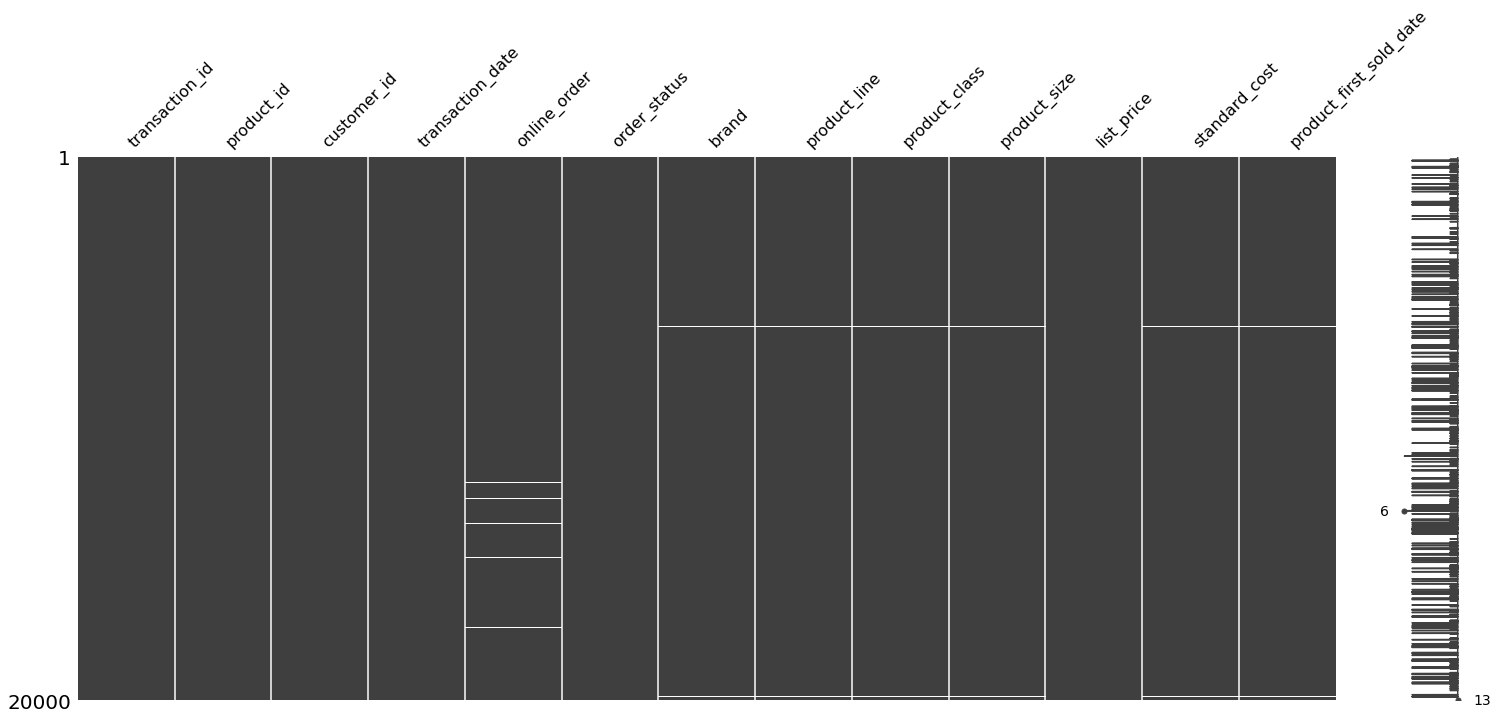

In [181]:
msno.matrix(transactions);

In [182]:
# rows with missing values
transactions[transactions.isna().any(1)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19843,19844,3,8,2017-01-28,NaN,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37823.0
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [183]:
# last transaction date which means the last 3 month since the last transaction was made starts on September 30
transactions['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [184]:
# Taking 3 month transactions
t3m=transactions[transactions['transaction_date']>='2017-09-30']
t3m.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37873.0
20,21,27,1582,2017-10-09,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0
23,24,82,515,2017-10-18,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,42404.0


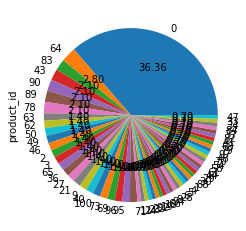

In [185]:
#32% of Missing values have product_id=0
t3m_null=t3m[t3m.isna().any(1)]
t3m_null['product_id'].value_counts().plot(kind='pie',autopct='%.2f');

In [186]:
t3m.shape

(5128, 13)

In [187]:
t3m.dropna().shape

(4985, 13)

In [188]:
#Deleting all the missing values
t3m=t3m.dropna()

In [189]:
t3m.reset_index(inplace=True)

In [190]:
#merging the 3 month transaction dataset with customer address
t3m=pd.merge(t3m, customeraddress, how='left', on='customer_id')

In [191]:
#merging the new 3 month transaction dataset with the customer demographic dataset
t3m=pd.merge(t3m, customerdemographic, how='left', on='customer_id')

In [192]:
t3m.head()

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,...,Male,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0
1,4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,...,Female,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0
2,15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,...,Male,56.0,1975-03-22,Assistant Manager,Health,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,12.0
3,20,21,27,1582,2017-10-09,0.0,Approved,Trek Bicycles,Standard,medium,...,Male,32.0,1978-01-14,Office Assistant III,Property,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,No,4.0
4,23,24,82,515,2017-10-18,0.0,Approved,Giant Bicycles,Road,medium,...,Female,55.0,1989-09-04,Help Desk Operator,IT,High Net Worth,N,ð¾ ð ð ð ð ð ð ð§,No,8.0


#### 2. Customer Demographic

In [193]:
# columns with missing values
customerdemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [194]:
#Total of missing values
customerdemographic.isna().sum().sum()

1763

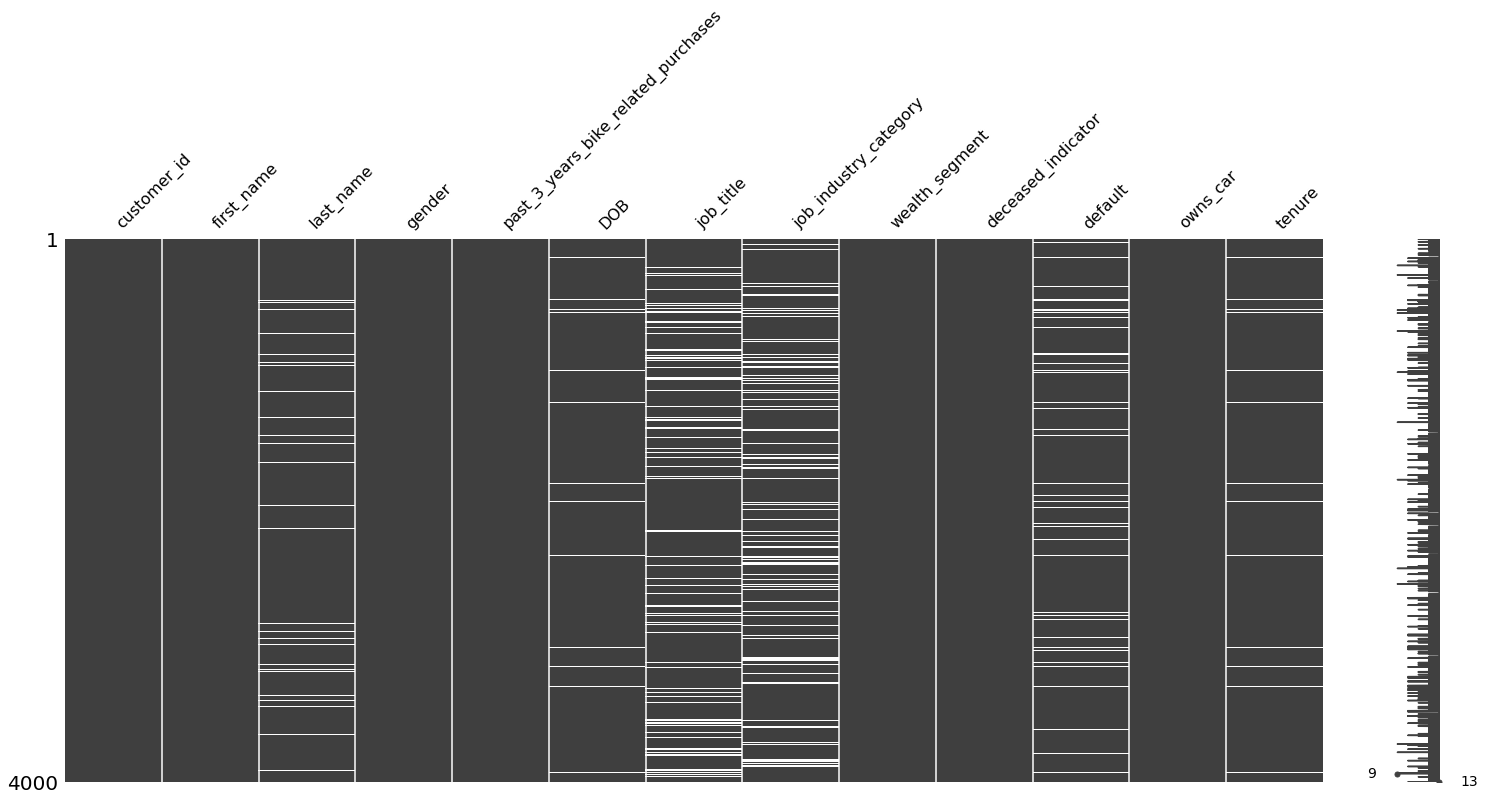

In [195]:
msno.matrix(customerdemographic);

I see no apparent relationship between missing values from different columns that have missing values

#### 3. Customer Addresses

In [196]:
customeraddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [197]:
t3m.drop([2176], inplace=True)

The following code we are going to remove unnecessary columns such as **default** (since it has unknown characters), **job_title, and job_industry_category** (since these columns have a lot of missing values and it is very hard to find a connection in order to fill those missing values.

In [198]:
t3m=t3m[['customer_id','first_name', 'last_name','gender','transaction_id', 'product_id','transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state','property_valuation','past_3_years_bike_related_purchases', 'wealth_segment', 'deceased_indicator',
        'owns_car','DOB','tenure']]

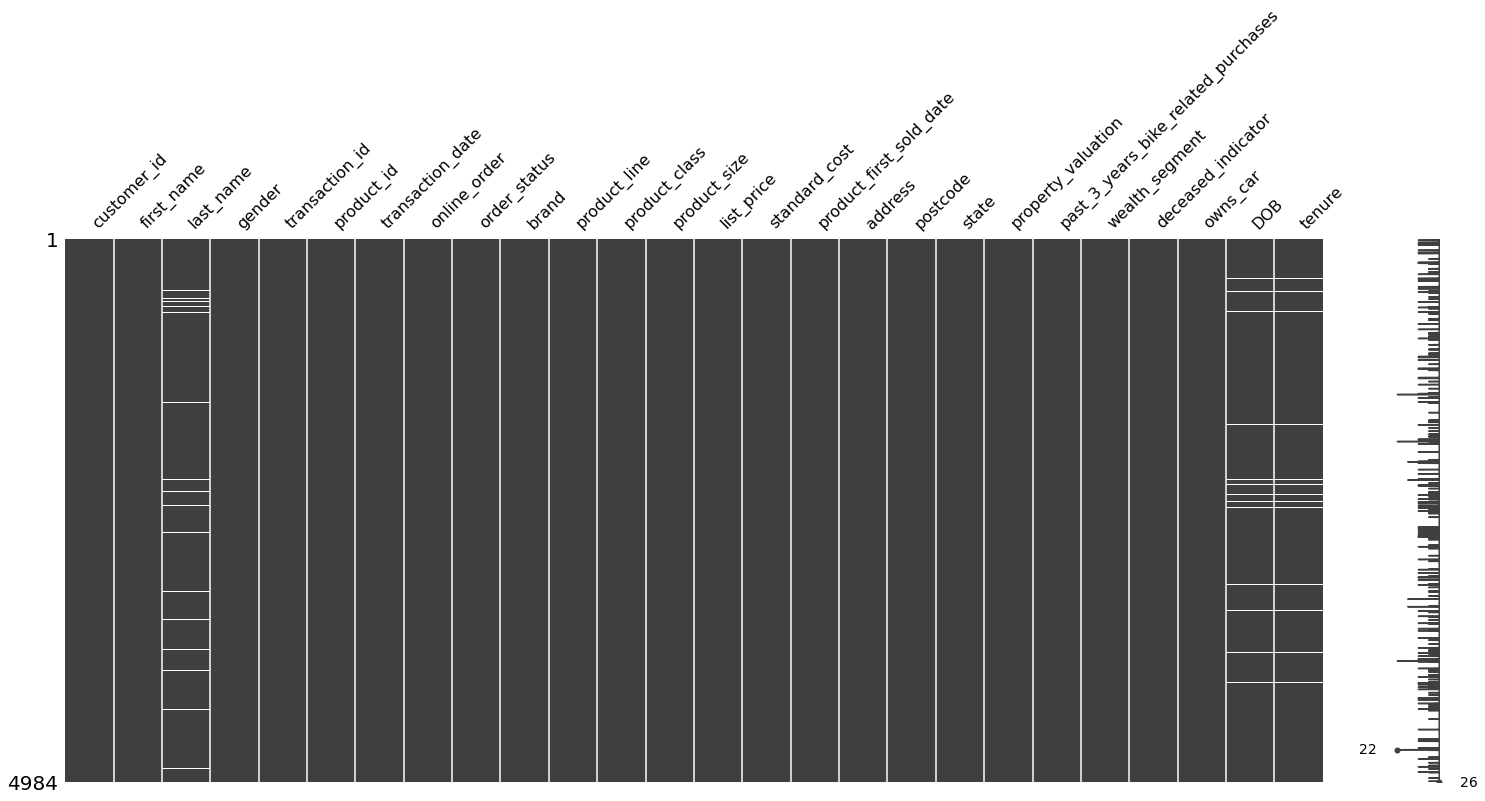

In [199]:
msno.matrix(t3m);

In [200]:
#Replacing Missing Values
t3m['last_name'].fillna('U', inplace=True)

In [201]:
#droping remaining missing values
t3m=t3m.dropna()

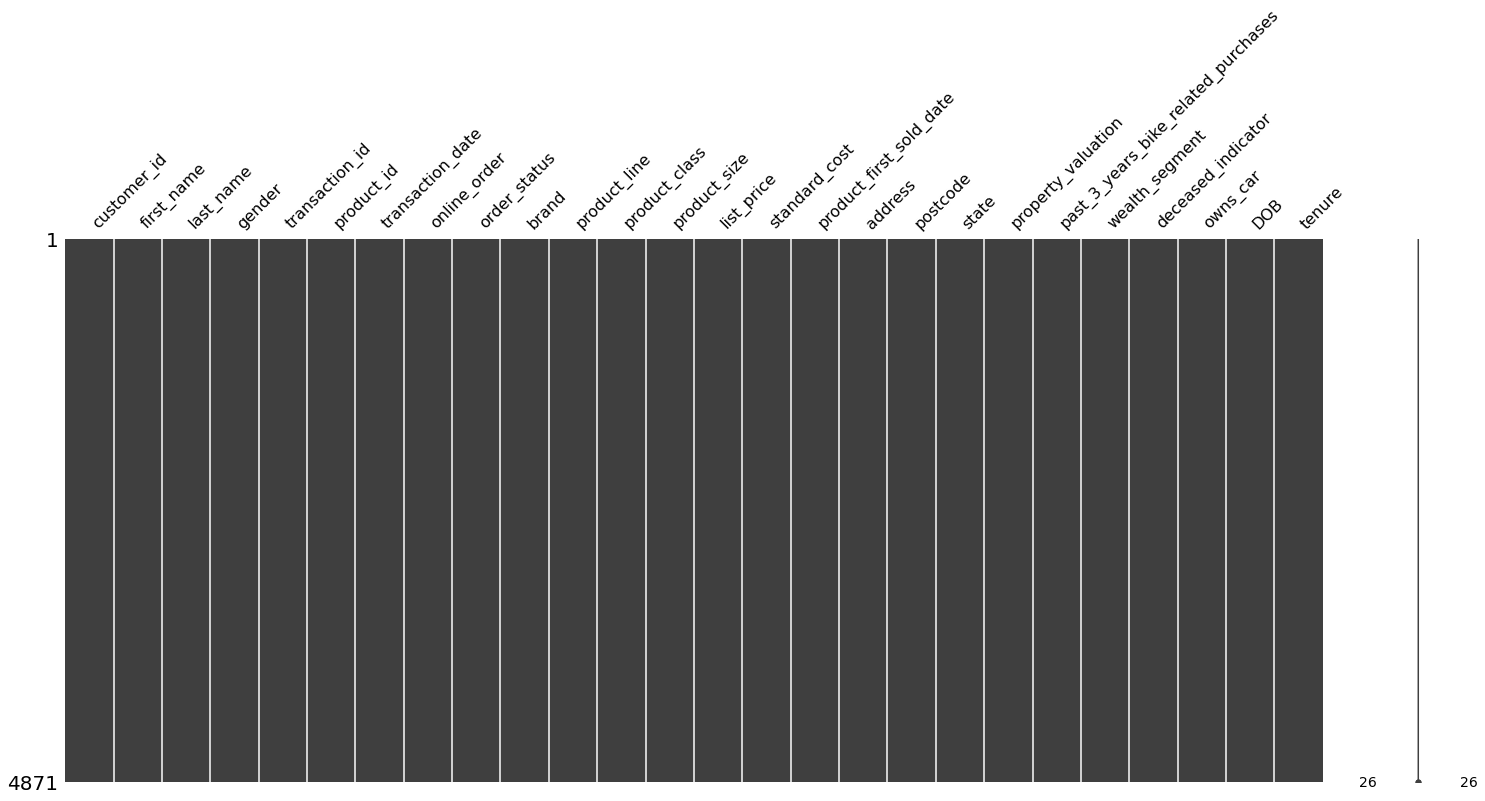

In [202]:
msno.matrix(t3m);

### Duplicated Values

In [203]:
#There are no duplicated values
t3m[t3m.duplicated()]

,customer_id,first_name,last_name,gender,transaction_id,product_id,transaction_date,online_order,order_status,brand,...,address,postcode,state,property_valuation,past_3_years_bike_related_purchases,wealth_segment,deceased_indicator,owns_car,DOB,tenure


### Incorrect Values

In [204]:
t3m['gender'].unique()

array(['Male', 'Female', 'F', 'Femal', 'M'], dtype=object)

In [205]:
#making the gender column with two values
t3m['gender'].replace(['Male', 'Female','Femal'],['M','F','F'], inplace=True)

In [206]:
t3m['gender'].unique()

array(['M', 'F'], dtype=object)

In [207]:
#Making the state column with 3 values
t3m['state'].replace(['New South Wales', 'Victoria'], ['NSW','VIC'], inplace=True)

In [208]:
t3m['state'].unique()

array(['NSW', 'VIC', 'QLD'], dtype=object)

### Transforming  serial Excel date to python datetime

In [209]:
t3m['product_first_sold_date']=pd.to_datetime(t3m['product_first_sold_date'].apply(lambda x: date(1900,1,1)+timedelta(x)))

In [210]:
t3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4871 entries, 0 to 4984
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4871 non-null   int64         
 1   first_name                           4871 non-null   object        
 2   last_name                            4871 non-null   object        
 3   gender                               4871 non-null   object        
 4   transaction_id                       4871 non-null   int64         
 5   product_id                           4871 non-null   int64         
 6   transaction_date                     4871 non-null   datetime64[ns]
 7   online_order                         4871 non-null   float64       
 8   order_status                         4871 non-null   object        
 9   brand                                4871 non-null   object        
 10  product_line

### Outliers

Checking outliers in the DOB and product_first_sold_date columns, we see that all the data in there is in a reasonable range, so there is no reason to think that in our dataset there is an outlier.

In [211]:
t3m.DOB.max()

Timestamp('2002-03-11 00:00:00')

In [212]:
t3m.DOB.min()

Timestamp('1931-10-23 00:00:00')

In [214]:
t3m['product_first_sold_date'].max()

Timestamp('2016-12-08 00:00:00')

In [215]:
t3m['product_first_sold_date'].min()

Timestamp('1991-01-23 00:00:00')

In [216]:
t3m.to_csv('3_month_transaction.csv')